# Project Midpoint Report
by Samra Kasim

## Evaluation of the Linear Regression Algorithm Utilizing Ordinary Least Squares Method

### Introduction

The Linear Regression algorithm is used for predictive analysis and it demonstrates the relationship (if it exists) between two variables using a linear equation (i.e., a straight line). [1] One variable is known as the dependent variable and the other as the independent variable. The algorithm utilizes the ordinary least squares method to create the line of best fit. The least square methods minimizes the sum of square errors. [2] Root Mean Square Error ($RMSE$) Root Mean Squared ($R^2$) calculations are used alongside Linear Regression to determine the accuracy of the model. The purpose of linear regression is to examine if a variable is a significant predictor of an outcome variable. Linear regression is often used in determining predictor strength, effect forecasting, and trend forecasting. [3]

### The Algorithm

The linear regression algorithm utlizes `numpy` arrays as the data structure to store and process data. The linear regression line has the equation in the form of

$$ Y = \beta_0 + \beta_1X $$ 

where $X$ is the independent variable and $Y$ is the dependent variable. $\beta1$ is the slope of the line and is also called the coefficient while $\beta0$ is the $y$ intercept and is also called the bias coefficient.

The algorithm utilizes the Ordinary Least Squares method for linear regression, which entails calculating the line of best fit by minimizing the sum of squares for each point. [5] The calculation of the sum of square errors for all points $n$ can be represented as the equation and the error is squared to account for negative error values 

$$ D = \sum \limits_{i=1}^{n} d_i^2 $$

The errors above as represented by $D$ can be minimzed by the following equation to calculate the slope $\beta_1$ and y intercept $beta_0$

$$ \beta_1 = \frac {\sum \limits_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})} {\sum \limits_{i=1}^{n} (x_i - \bar{x})}$$

$$ \beta_0 = \bar{y} - \beta_1{x}$$

Therefore, the algorithm is as follows:
1. Calculate the mean of all $x$ values in the dataset.
2. Calculate the mean of all $y$ values in the dataset.
3. For every pair of $x$ and $y$ values, calculate the difference of every $x_i$ value from the mean. Then multiply that by the difference of every $y_i$ value and its difference from $\bar{y}$ to calculate the numerator of the slope and square the value to calcuate the denominator of the slope.  
4. Calculate the $\beta_1$ value by dividing the numerator and denominator for the previous step
5. Calculate the $\beta_0$ value by subtracting the multiplication of the slop from the previous step with $\bar{x}$ and subtracting that value $\bar{y}$

The straight line $y = \beta_0 + \beta_1X$ generated from the above algorithm is the line of best for the given data points.

To calculate the accuracy of the model, this project utilizes $RMSE$ and $R^2$. $RMSE$ as represented by the following equation and measures the residual, which is the difference between the predicted ($\hat{y_i}$) and actual ($y_i$) values of a model. [6] The smaller the RMSE value the closer the model is a git to the data. [8]

$$RMSE = \sqrt{ \sum \limits_{i=1}^{n} \frac{1}{m} (\hat{y_i} - y_i)^2}$$

The $R^2$ error measure denotes the proportion of variance of an dependent variable that can be explained by the indepenent variable. The $SS_t$ value represents the unexplained variation and the $SS_r$ value represents total variation. The closer the $R^2$ is to $1$ the better fit the predicted model is to the data. [7]

 $$ SS_t = \sum \limits_{i=1}^{n} (y_i - \bar{y})^2 $$
 $$ SS_r = \sum \limits_{i=1}^{n} (y_i - \hat{y})^2 $$
 $$ R^2 = 1 - \frac{SS_r}{SS_t}$$



### The Algorithm Script

In [1]:
import numpy as np

In [2]:
def ordinary_least_squares(X, y, N):
    # calculate mean of all X values
    mean_x = np.mean(X)                                # O(n)
    # calculate mean of all y values
    mean_y = np.mean(y)                                # O(n)
    numerator = 0                                      # O(1)
    denominator = 0                                    # O(1)
    # for each (x,y) par in the dataset
    # minimize the errors
    for i in range(N):                                 # O(n)
        numerator += (X[i] - mean_x) * (y[i] - mean_y) # O(1)
        denominator += (X[i] - mean_x) ** 2            # O(1)

    # calculate the slope of the line
    b1 = numerator/denominator                         # O(1)
    # calculate the y intercept of the line
    b0 = mean_y - (b1 * mean_x)                        # O(1)
    
    return b1, b0                                      # O(1)


### Error Calculation

In [3]:
# calculate every predicted y values given a b0, b1
def calculate_y_pred(X, b0, b1, N):
    y_pred = b0 + b1*X  # O(n) because uses numpy array multiplication
    return y_pred       # O(1)

In [4]:
# calculate the RMSE
def calculate_rmse(X, y, y_pred, N):
    rmse = 0                                          # O(1)
    # for every (x,y) pair
    for i in range(N):                                # O(n)
        y_actual = y[i]                               # O(1)
        # sum the residual of by taking the 
        # squared difference of actual y value
        # from the predicted by value
        rmse += (y_pred[i] - y_actual) ** 2           # O(1)
    # calcualte the average rmse
    rmse = rmse/N                                     # O(1)
    # square root the average rmse
    return np.sqrt(rmse)                              # O(1)

In [5]:
# calculate r^2
def calculate_r_squared(X, y, b0, b1, y_pred, mean_y, N):
    ssr = 0                                           # O(1)
    sst = 0                                           # O(1)
    # for every (x,y) pair
    for i in range(N):                                # O(n)
        # calculate total variance
        ssr += (y[i] - y_pred[i]) ** 2                # O(1)                
        # calculate unexplained variance
        sst += (y[i] - mean_y) ** 2                   # O(1)
    # subtract from 1 to provide a ratio
    # representing r^2
    r_squared = 1 - (ssr/sst)                         # O(1)
    return r_squared                                  # O(1)

### Canonical Test Data Generation

The following method faciliate generation of data of various sizes and writing and reading data to a pickle file. The data utilizes a linear equation with parameterized $\beta_0$, $\beta_1$, and noise values that can be manipulated to enhance the variability of the datasets. In addition, gaussian randomization with parameterized $\mu$ and $\sigma$ values are also added to the linear equation to add variability.

In [6]:
import pickle as pk
from random import randint
import random

In [7]:
# linear function to generate y values from given X values
# param X represents a list of x values
# param noise represents the level of noise to add to the linear equation
def linear_function(X, noise, b1, b0, mu, sigma):
    # to provide variability in the generated random set
    # gaussian randomization is added to the linear equation
    # noise is added to give added variability
    gaussian_randomization = np.random.normal(mu, sigma, len(X))    
    y = (b1*X) + b0 + (gaussian_randomization*noise)
    return y # list of y values and data{X:y} dict

In [8]:
# generate X and y values and a data dict {X:y} for storage
def generate_data_values(array_size, noise, stop, b1, b0, mu, sigma):
    # generate x values based on the array_size provided
    x_list = np.linspace(1.0, stop, num=array_size, endpoint=False, dtype=float)
    # convert x values to an numpy array
    X = np.array(x_list)
    y = linear_function(X, noise, b1, b0, mu, sigma)
    data = dict(zip(X, y)) # create a dictionary {X:Y} for pickle storage
    return data

In [9]:
# pickling data 
def generate_canonical_test_files(array_size, noise=.5, stop=100.0, b1=2, b0=2, mu=0, sigma=2):
    # given a list of array size for each of the array size
    # generate a file and save it to disk
    for i in range(len(array_size)):
        filename = 'data_' + str(array_size[i])
        outfile = open(filename, 'wb')
        # generate values
        data = generate_data_values(array_size[i], noise, stop, b1, b0, mu, sigma)
        # write values to a file
        pk.dump(data, outfile)
        print(filename + ' created')
        outfile.close()

In [10]:
# unpickling data
def read_data_file(filename):
    # read a given file on disk and load it into memory
    infile = open(filename, 'rb')
    data = pk.load(infile)
    infile.close()
    return data # returns a dictionary in the form {X:y}

In [11]:
# parse loaded Pickle dictionary into X, Y lists
def parse_data_dict(adict):
    X, y = zip(*adict.items())
    return np.array(X), np.array(y) # return numpy arrays
        

### Algorithm Demonstration

#### Alogrithm run with low noise

In [12]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, Latex

In [13]:
# generate test files of the following sizes
array_size = [10,100,1000,10000,100000]
display(Markdown('**Generating canonical files:**'))
generate_canonical_test_files(array_size, noise=2, stop=500, b1=3, b0=5)

# read the following file and load data in memory
filename = 'data_100000'
data = read_data_file(filename)
X, y = parse_data_dict(data)
display(Markdown('*Loaded file: %s*' % filename))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
N_train = len(X_train)
N_test = len(X_test)
b1, b0 = ordinary_least_squares(X_train, y_train, N_train)
display(Markdown('**Analysis:** '))
display(Markdown('$y=%s+%sX$' %(b0,b1)))
y_pred_train = calculate_y_pred(X_train, b0, b1, N_train)
y_pred_test = calculate_y_pred(X_test, b0, b1, N_test)
rmse = calculate_rmse(X_test, y_test, y_pred_test, N_test)
display(Markdown('$RMSE$: %s' % rmse))
r2 = calculate_r_squared(X_test, y_test, b0, b1, y_pred_test, np.mean(y_test), N_test)
display(Markdown('$R^2$: %s' % r2))



**Generating canonical files:**

data_10 created
data_100 created
data_1000 created
data_10000 created
data_100000 created


*Loaded file: data_100000*

**Analysis:** 

$y=5.020564045488072+2.999940964767991X$

$RMSE$: 3.979493657778249

$R^2$: 0.9999151611250154

#### Plotting data

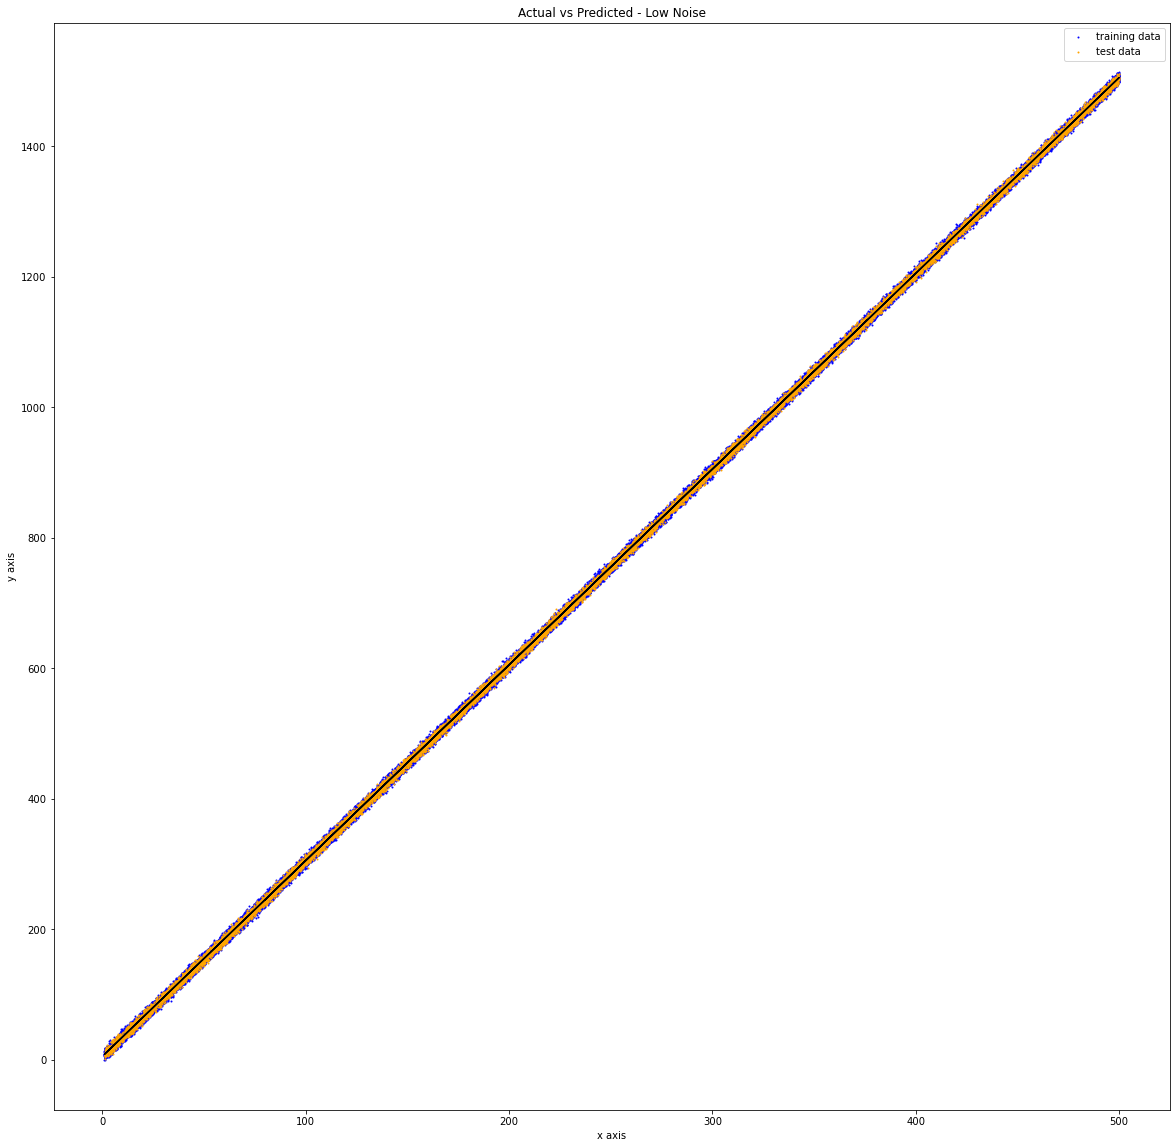

In [14]:
# plot of training data with low noise
# increase size of plot
plt.figure(figsize=(20,20))
# plotting points
plt.scatter(X_train, y_train, label='training data', color='blue', s=1)
plt.scatter(X_test, y_test, label='test data', color='orange', s=1)
# plotting predicted line
plt.plot(X_train, y_pred_train, color='black')
# add x-label
plt.xlabel('x axis')
# add y-label
plt.ylabel('y axis')
# plot title
plt.title('Actual vs Predicted - Low Noise')
# show legend
plt.legend()
#show graph
plt.show()

In [15]:
# generate test files of the following sizes
array_size = [10000]
display(Markdown('**Generating canonical files:**'))
generate_canonical_test_files(array_size, noise=15, mu=0, sigma=3)

# read the following file and load data in memory
filename = 'data_10000'
data = read_data_file(filename)
X, y = parse_data_dict(data)
display(Markdown('*Loaded file: %s*' % filename))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
N_train = len(X_train)
N_test = len(y_test)
b1, b0 = ordinary_least_squares(X_train, y_train, N_train)
display(Markdown('**Analysis:** '))
display(Markdown('$y=%s+%sX$' %(b0,b1)))
y_pred_train = calculate_y_pred(X_train, b0, b1, N_train)
y_pred_test = calculate_y_pred(X_test, b0, b1, N_test)
rmse = calculate_rmse(X_test, y_test, y_pred_test, N_test)
display(Markdown('$RMSE$: %s' % rmse))
r2 = calculate_r_squared(X_test, y_test, b0, b1, y_pred_test, np.mean(y_test), N_test)
display(Markdown('$R^2$: %s' % r2))


**Generating canonical files:**

data_10000 created


*Loaded file: data_10000*

**Analysis:** 

$y=3.0798605921985143+1.9889524935293277X$

$RMSE$: 45.159609745086875

$R^2$: 0.6121222631570203

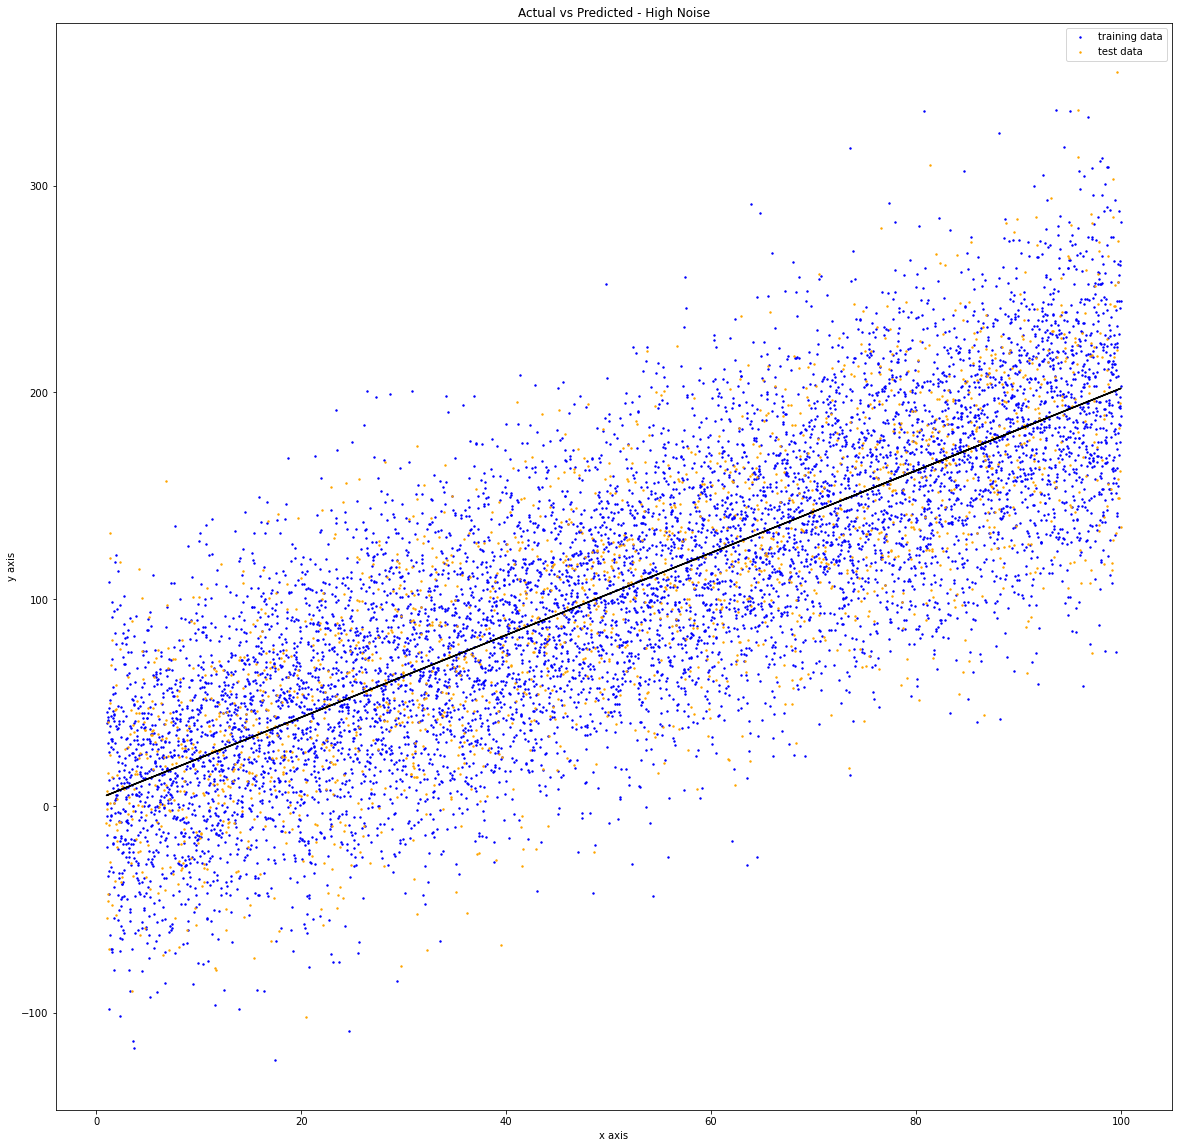

In [16]:
# plot of training data with high noise noise
# increase size of plot
plt.figure(figsize=(20,20))
# plotting points
plt.scatter(X_train, y_train, label='training data', color='blue', s=2)
plt.scatter(X_test, y_test, label='test data', color='orange', s=2)
# plotting predicted line
plt.plot(X_train, y_pred_train, color='black')
# add x-label
plt.xlabel('x axis')
# add y-label
plt.ylabel('y axis')
# plot title
plt.title('Actual vs Predicted - High Noise')
# show legend
plt.legend()
#show graph
plt.show()

#### Algorithm Validation


In [17]:
def validate_algorithm():
    x_list = np.linspace(1.0, stop=100, num=10, endpoint=False, dtype=float)
    X = np.array(x_list)
    y = linear_function(X, noise=0, b1=3.2, b0=1.7, mu=0, sigma=2)
    N = 10
    b1, b0 = ordinary_least_squares(X, y, N)
    y_pred = calculate_y_pred(X, b0, b1, N)
    rmse = calculate_rmse(X, y, y_pred, N)
    r2 = calculate_r_squared(X, y, b0, b1, y_pred, np.mean(y), N)
    display(Markdown('**Validating algorithm...**' ))
    if round(b1,3) == 3.2 and round(b0,3) == 1.7:
        print('ordinary least squares algorithm is correct')
    if y_pred.all() == y.all():
        print('predicted y values are correct')
    if round(r2,3) == 1.0 and round(rmse, 3) == 0.0:
        print('r^2 and rmse values are correct')

validate_algorithm()


**Validating algorithm...**

ordinary least squares algorithm is correct
predicted y values are correct
r^2 and rmse values are correct


### Theoretical Analysis

The following provides the time and space complexity of the ordinary least squares algorithm. Refer to the above cells for details on algorithm complexity  

**Worst case:**  There are $N$ elements in each $X$ and $y$ arrays. The algorithm runs three loops N times:   
  1) calculate the mean of all X values   
  2) calculate the mean of all y values   
  3) main loop. Together, they combine to produce a worst case complexity of $\mathcal{O}(n+n+n)$, which utilizing asymptotic analysis is $\mathcal{O}(n)$.    
**Average case:** Since each of the three loops have to be run no matter the size or nature of the elements in the array, the average case complexity is also $\mathcal{O}(n)$.  
**Space complexity:** The $X$, $y$ arrays each have a space complexity of $\mathcal{O}(n)$. The other variables $N$, `mean_x`, `mean_y`, `numerator`, `denominator`, `b1`, and `b0` all hold single values and have space complexity of $\mathcal{O}(1)$ each. Together the space complexity for the algorithm is $\mathcal{O}(n+n+7)$ and with asymptotic analysis it is $\mathcal{O}(n)$

### Empirical Plan

To empirically analyze the ordinary least sqaures algorithm, the following steps will be executed:
1. Create datasets of size $100$; $1,000$; $10,000$; $100,000$; $1,000,000$ with low noise, i.e., `noise=2` and $\sigma=2$
2. Create datasets of size $100$; $1,000$; $10,000$; $100,000$; $1,000,000$ with high noise, i.e., `noise=15` and $\sigma=3$  
3.  Split data into training data and test data, use input into the training data to generate $\beta_0$ and $\beta_1$ values and use the test data to generate $RMSE$ and $R^2$ values  
4. For each dataset create a plot of the data with the predicted linear line to visually demonstrate how the predicted line fits the data
5. For each dataset capture the $\beta_0$, $\beta_1$, $RMSE$, and $R^2$ in a pandas dataframe and utilize the dataframe to plot the values comparing:
    * actual $\beta_0$, $\beta_1$ versus predicted as the size of the datasets increases  
    * $RMSE$ values for low noise datasets versus high noise datasets as the size of the datasets increases  
    * $R^2$ values for low noise datasets versus high noise datasets as the size of the datasset increases  
6. Measure run time for each run of the alogrithm for each dataset using Python's `time` function and plot the results as the size of datasets increases  

### Sources

[1] Linear Regression, www.stat.yale.edu/Courses/1997-98/101/linreg.htm.  
[2] Kenton, Will. “How the Least Squares Method Works.” Investopedia, Investopedia, 16 Sept. 2020, www.investopedia.com/terms/l/least-squares-method.asp#:~:text=The least squares method is a statistical procedure to find,the behavior of dependent variables.  
[3] “What Is Linear Regression?” Statistics Solutions, www.statisticssolutions.com/what-is-linear-regression/.  
[4] Raheem, Abdul Hafeez Abdul. “Linear Regression from Scratch.” Medium, Towards Data Science, 11 Nov. 2018, towardsdatascience.com/linear-regression-from-scratch-cd0dee067f72.
[5] “Linear Regression from Scratch in Python.” Mubaris NK, mubaris.com/posts/linear-regression/.  
[6] RMS Error, statweb.stanford.edu/~susan/courses/s60/split/node60.html.
[7] Frost, Jim, et al. “How To Interpret R-Squared in Regression Analysis.” Statistics By Jim, 16 July 2020, statisticsbyjim.com/regression/interpret-r-squared-regression/.  
[8] “What Are Mean Squared Error and Root Mean Squared Error?” Technical Information Library, 30 Nov. -1, www.vernier.com/til/1014.
